In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [17]:
### edges df
edges_df = pd.read_csv('../network_inputs/unique_id_network_attributes.csv')
edges_df['edge_id_igraph'] = edges_df['uniqueid']
edges_df.head(2)

,uniqueid,osmid,length,highway,bridge,tunnel,lanes,maxspeed,capacity,fft,weight,start,end,start_sp,end_sp,geometry,edge_id_igraph
0,0,7714200,175.637,residential,NaN,NaN,1,25.0,950.0,15.715577,18.858693,0,2,1,3,"LINESTRING (-122.7694487 38.4353358, -122.7692...",0
1,1,7714200,62.870,residential,NaN,NaN,1,25.0,950.0,5.625457,6.750548,0,224222,1,224223,"LINESTRING (-122.7694487 38.4353358, -122.7695...",1


In [8]:
### results
res_before = pd.read_csv('edges_df/edges_df_scenFLOW_r0_DYna_HR9_QT3.csv').merge(edges_df[['edge_id_igraph', 'length', 'geometry']], how='left', on='edge_id_igraph')
res_after = pd.read_csv('edges_df/edges_df_scenFLOW_remaining_r0_DYna_HR9_QT3.csv').merge(edges_df[['edge_id_igraph', 'length', 'geometry']], how='left', on='edge_id_igraph')
res_before.head(2)

print(np.sum(res_before['tot_vol']*res_before['length'])/1000)
print(np.sum(res_after['tot_vol']*res_after['length'])/1000)

,edge_id_igraph,tot_vol,true_vol,t_avg,length,geometry
0,0,8.0,0.0,18.86,175.637,"LINESTRING (-122.7694487 38.4353358, -122.7692..."
1,1,1.0,0.0,6.75,62.870,"LINESTRING (-122.7694487 38.4353358, -122.7695..."


In [10]:
# for scen_id in ['n%1', 'c%0', 'c%1', 'hc%0.5', 'hc%1']:
for scen_id in ['c%0', 'hc%0.5', 'n%1']:
    tot_travel_time = 0
    for hour in range(6,10):
        for quarter in range(4):
            res = pd.read_csv('edges_df/edges_df_true_scen{}_r0_DYna_HR{}_QT{}.csv'.format(scen_id, hour, quarter))
            tot_travel_time += np.sum(res['true_vol'] * res['t_avg'])/3600
            # print(scen_id, hour, quarter, np.max(np.sum(res['true_vol'] * res['t_avg'])/3600))
            # print(res.sort_values(by='t_avg', ascending=False).head())
            # print(res[res['edge_id_igraph'].isin([76239, 285158, 313500, 425877])])
        #     break
        # break
    # break
    print(scen_id, tot_travel_time)

c%0 1154197.8746611113
hc%0.5 1181458.119888889
n%1 1399872.6105333332


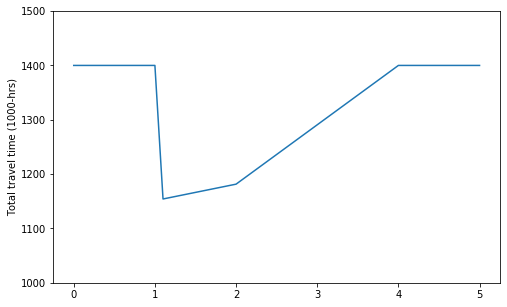

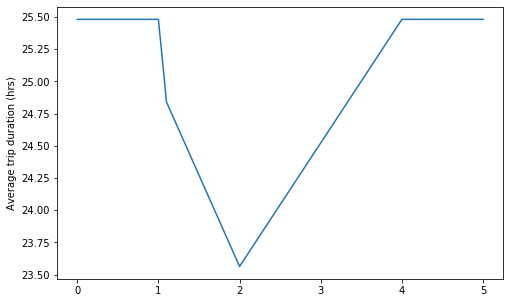

In [20]:
res_df = pd.DataFrame({'scen': ['c%0', 'hc%0.5', 'n%1'], 'od_cnt': [2793324-5255, 3008472, 3296260], 'tot_travel_time': [1154198, 1181458, 1399873]})
# res_df = pd.DataFrame({'scen': ['c%0', 'hc%0.5', 'n%1'], 'od_cnt': [2793324-42371-5255, 3008472-16595, 3296260-16203], 'tot_travel_time': [1154198, 1181458, 1399873]})
resilience_df = pd.DataFrame({'x_axis': [0, 1, 1.1, 2, 4, 5], 'scen': ['n%1', 'n%1', 'c%0', 'hc%0.5', 'n%1', 'n%1']})
resilience_df = resilience_df.merge(res_df, how='left', on='scen')

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(resilience_df['x_axis'], resilience_df['tot_travel_time']/1000)
ax.set_ylim([1000, 1500])
ax.set_ylabel('Total travel time (1000-hrs)')
plt.show()

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(resilience_df['x_axis'], resilience_df['tot_travel_time']/resilience_df['od_cnt']*60)
# ax.set_ylim([1000, 1500])
ax.set_ylabel('Average trip duration (hrs)')
plt.show()